# 데이터 로드하기

로이터에서 공개한 로이터 데이터셋 사용

In [1]:
from keras.datasets import reuters

# 가장 자주 등장하는 단어 1만 개로 제한 
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print("train_data의 shape",train_data.shape)
print("train_labels의 shape",train_labels.shape)

train_data의 shape (8982,)
train_labels의 shape (8982,)


## 각 샘플은 정수 리스트, 87개의 숫자로 이루어져있음

In [3]:
print(len(train_data[0]))
print(type(train_data[0]))
train_data[0]

87
<class 'list'>


[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

## label은 0~45 사이의 정수

In [4]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [5]:
print("label min:",min(train_labels))
print("label max:",max(train_labels))

label min: 0
label max: 45


## 샘플 디코딩

In [6]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
# 0,1,2는 패딩,문서시작,사전에없음을 위한 인덱스이므로 -3
decoded_news=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

# 데이터 전처리하기

## 함수 vectorize_seqs(seqs,dimension=10000) 정의 :

one-hot encoding이용해서 벡터로 변환


\* 또는 내장 함수 ```to_categorical``` 이용 \*

In [7]:
import numpy as np

In [8]:
def vectorize_seqs(seqs,dimension=10000):
    
    results=np.zeros((len(seqs),dimension))
    
    for i,seq in enumerate(seqs):
        results[i,seq]=1
    
    return results

## Input data x 만들기

In [9]:
x_train=vectorize_seqs(train_data)
x_test=vectorize_seqs(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## Lable data y 만들기

In [11]:
# 0~45니까 46개니까 dimension=46
y_train=vectorize_seqs(train_labels,dimension=46)
y_test=vectorize_seqs(test_labels,dimension=46)

In [12]:
# 확인
print(train_labels[0])
print(y_train[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 모델 구성

In [13]:
from keras import models
from keras import layers

model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일하기
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# 훈련,검증하기

## validation set 만들기

In [14]:
x_val=x_train[:1000]
x_data=x_train[1000:]

y_val=y_train[:1000]
y_data=y_train[1000:]

## 훈련하기

In [15]:
history=model.fit(x_data,y_data,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 567us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 202us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 194us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 191us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 191us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


## Loss 그래프 그리기

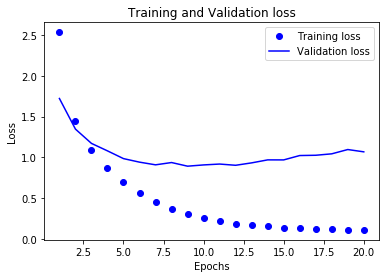

In [16]:

import matplotlib.pyplot as plt
%matplotlib inline

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

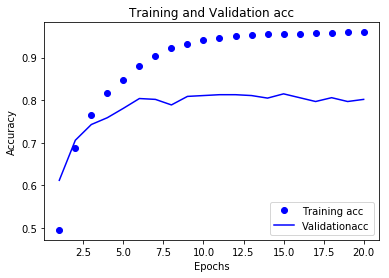

In [17]:
plt.clf()

acc=history.history['acc']
val_acc=history.history['val_acc']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label="Training acc")
plt.plot(epochs,val_acc,'b',label="Validationacc")

plt.title("Training and Validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 새로운 데이터에 대해 예측하기

In [18]:
predictions=model.predict(x_test)

In [19]:
# 길이가 46인 벡터가 2246개
predictions.shape

(2246, 46)

In [20]:
# 샘플 원소의 합은 1
np.sum(predictions[2])

1.0

In [21]:
# 가장 큰 값이 예측 클래스가 된다
np.argmax(predictions[2])

1

In [22]:
# 정답
np.argmax(y_test[2])

1

In [23]:
_,acc=model.evaluate(x_test,y_test)

2246/2246 [==============================] - 1s 250us/step


In [24]:
# 77% 의 정확도로 새로운 데이터를 예측한다
acc

0.778717720444884

# 모델 개선하기

위의 그래프를 보면 epoch이 9 이후부터 overfitting이 나타남

epoch을 9까지만 처음부터 다시 훈련하기

In [25]:
model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
# 중간층이 46보다 작게되면 병목이 일어남
model.add(layers.Dense(64,activation='relu'))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

model.fit(x_data,y_data,epochs=9,batch_size=512)

Epoch 1/9
7982/7982 [==============================] - 2s 228us/step - loss: 2.5398 - acc: 0.5226
Epoch 2/9
7982/7982 [==============================] - 2s 235us/step - loss: 1.3712 - acc: 0.7121
Epoch 3/9
7982/7982 [==============================] - 1s 171us/step - loss: 1.0136 - acc: 0.7781
Epoch 4/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.7976 - acc: 0.8251
Epoch 5/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.6393 - acc: 0.8624
Epoch 6/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.5124 - acc: 0.8921
Epoch 7/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.4124 - acc: 0.9137
Epoch 8/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.3355 - acc: 0.9290
Epoch 9/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.2782 - acc: 0.9371


In [26]:
_,acc=model.evaluate(x_test,y_test)

2246/2246 [==============================] - 1s 292us/step


In [27]:
# 78%  => 1% 올림
acc

0.7756010686194165

# 추가 실험

## 1-1. 더 큰 층 사용 : unit 128

In [28]:
model=models.Sequential()

model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일하기
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_data,y_data,epochs=9,batch_size=512)

_,acc=model.evaluate(x_test,y_test)

Epoch 1/9
7982/7982 [==============================] - 2s 256us/step - loss: 2.1379 - acc: 0.5540
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.0956 - acc: 0.7648
Epoch 3/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.7737 - acc: 0.8322
Epoch 4/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.5631 - acc: 0.8834
Epoch 5/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.4036 - acc: 0.9158
Epoch 6/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.3238 - acc: 0.9315
Epoch 7/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.2422 - acc: 0.9458
Epoch 8/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.2104 - acc: 0.9486
Epoch 9/9
2246/2246 [==============================] - 1s 324us/step


In [29]:
acc

0.7925200356719543

## 1-2. 더 작은 층 사용 : unit 32

In [30]:
model=models.Sequential()

model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일하기
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_data,y_data,epochs=9,batch_size=512)

_,acc=model.evaluate(x_test,y_test)

Epoch 1/9
7982/7982 [==============================] - 2s 225us/step - loss: 3.1446 - acc: 0.3497
Epoch 2/9
7982/7982 [==============================] - 1s 171us/step - loss: 2.0043 - acc: 0.6129
Epoch 3/9
7982/7982 [==============================] - 1s 175us/step - loss: 1.4758 - acc: 0.6998
Epoch 4/9
7982/7982 [==============================] - 1s 177us/step - loss: 1.1893 - acc: 0.7459
Epoch 5/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.0041 - acc: 0.7899
Epoch 6/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.8621 - acc: 0.8198
Epoch 7/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.7438 - acc: 0.8445
Epoch 8/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.6416 - acc: 0.8683
Epoch 9/9
2246/2246 [==============================] - 1s 281us/step


In [31]:
acc

0.773820124666073

## 2-1. 은닉 층 1개 사용

In [32]:
model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일하기
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_data,y_data,epochs=9,batch_size=512)

_,acc=model.evaluate(x_test,y_test)

Epoch 1/9
7982/7982 [==============================] - 2s 242us/step - loss: 2.6139 - acc: 0.5695
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.4582 - acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 171us/step - loss: 1.0503 - acc: 0.7933
Epoch 4/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.8230 - acc: 0.8363
Epoch 5/9
7982/7982 [==============================] - 1s 177us/step - loss: 0.6631 - acc: 0.8728
Epoch 6/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.5420 - acc: 0.8943
Epoch 7/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.4485 - acc: 0.9092
Epoch 8/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.3742 - acc: 0.9246
Epoch 9/9
2246/2246 [==============================] - 1s 278us/step


In [33]:
acc

0.7965271594475554

## 2-2 은닉층 3개 사용

In [34]:
model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
# 마지막 출력층 => label 종류 수와 같아야함
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일하기
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_data,y_data,epochs=9,batch_size=512)

_,acc=model.evaluate(x_test,y_test)

Epoch 1/9
7982/7982 [==============================] - 2s 249us/step - loss: 2.6742 - acc: 0.4949
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.4193 - acc: 0.6983
Epoch 3/9
7982/7982 [==============================] - 1s 175us/step - loss: 1.0551 - acc: 0.7769
Epoch 4/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.8387 - acc: 0.8150
Epoch 5/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.6598 - acc: 0.8523
Epoch 6/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.5212 - acc: 0.8811
Epoch 7/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.4145 - acc: 0.9064
Epoch 8/9
7982/7982 [==============================] - 1s 172us/step - loss: 0.3344 - acc: 0.9261
Epoch 9/9
2246/2246 [==============================] - 1s 295us/step


In [35]:
acc

0.7756010685663401